# Case Study: Predicting Fuel Economy

This notebook is the redo of the case study fuel economony in Applied Predictive Modeling.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Read and Explore Dataset

In [3]:
df = pd.read_csv('fueleconomy.csv')

In [4]:
df.ModelYear.value_counts()

2010    1107
2011     245
2012      95
Name: ModelYear, dtype: int64

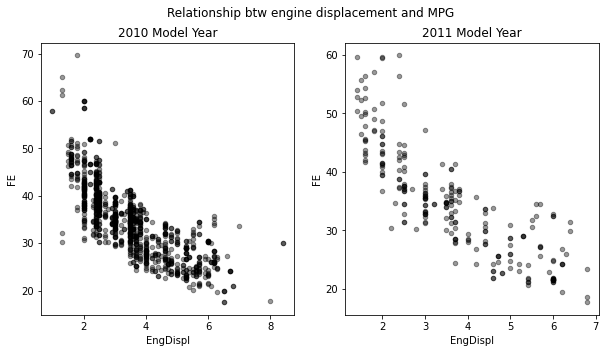

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Relationship btw engine displacement and MPG')

grouper = df[df.ModelYear != 2012].groupby('ModelYear')
grouper.get_group(2010).plot.scatter(x='EngDispl', y='FE', ax=ax1, c='black', alpha=0.4)
grouper.get_group(2011).plot.scatter(x='EngDispl', y='FE', ax=ax2, c='black', alpha=0.4)
ax1.set_title('2010 Model Year')
ax2.set_title('2011 Model Year')
plt.show()

## Models

### Simple Linear Regression

In [6]:
X_train = df[df.ModelYear == 2010].EngDispl.values.reshape(-1, 1)
y_train = df[df.ModelYear == 2010].FE.values.reshape(-1, 1)
X_test = df[df.ModelYear == 2011].EngDispl.values.reshape(-1, 1)
y_test = df[df.ModelYear == 2011].FE.values.reshape(-1, 1)

In [7]:
reg = LinearRegression().fit(X_train, y_train)

In [8]:
y_pred = reg.predict(X_train)

In [9]:
print("""Slope: {slope}
Intercept: {intercept}
Root mean square error (RMSE): {rmse}
Residual's sum of squares (R^2): {rsq}
""".format(
    slope=reg.coef_,
    intercept=reg.intercept_,
    rmse=mean_squared_error(y_train, y_pred, squared=False),
    rsq = reg.score(X_train, y_train) # r2_score(y_train, y_pred)
))

Slope: [[-4.52092928]]
Intercept: [50.56322991]
Root mean square error (RMSE): 4.620076226095307
Residual's sum of squares (R^2): 0.6199890367994589



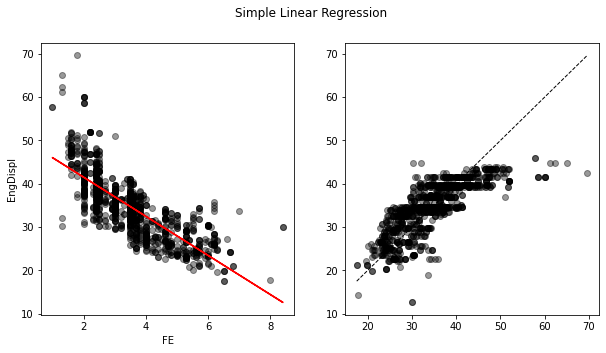

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Simple Linear Regression')

axes[0].scatter(X_train, y_train, c='black', alpha=0.4)
axes[0].plot(X_train, y_pred, c='r')
axes[0].set_xlabel('FE')
axes[0].set_ylabel('EngDispl')
axes[1].scatter(y_train, y_pred, c='black', alpha=0.4)
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)

plt.show()